> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMBD Movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> in this notebook i'm trying to explore tmdb movies dataset and gain usefull insights from it to make a business decesions that might help to understand the market of movies  the dataset of shape 10866 rows and 21 columns the main features are : ('title', 'budget', 'genres','popularity', 'production_companies', 'release_date', 'revenue', 'runtime', 'vote_average' and 'vote_count')
> **What are we trying to know ?**
<ul>
    <li><a href="#Q1">Q1</a></li>
    how is the movie industry changing over Time regarding the Rate, budget and popularity ? 
    <li><a href="#Q2">Q2</a></li>
    what are the most popular genres ? and how it changes over time ?
    <li><a href="#Q3">Q3</a></li>
    what is the biggest company in movie industry ? and how it changes over time ? 
    <li><a href="#Q4">Q4</a></li>
    comparing between revnue and budget ?

In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
#importing the data 
movies_df = pd.read_csv('tmdb-movies.csv')

# explore the data
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# get the shape of the dataset
movies_df.shape

(10866, 21)

In [4]:
# get the summary statstics of numeric columns 
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# explore the columns
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# count the missing values of eac column
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> it seems that homepage, tagline, keywords, and production_companies have big count of missing values

In [7]:
# count the duplicate values in the dataset
movies_df.duplicated().sum()

1

### Data Cleaning
- dropping unwanted columns
- reformate columns type
- dealing with outliers 

***Dropping N/A and unwanted columns***

In [8]:
# create a variables for rows and columns to compare the diffrence after droping
row,col = movies_df.shape

movies_df.isnull().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [9]:
movies_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

#### Chooes the most informative columns 

In [10]:
data = movies_df[[ 'budget', 'genres',
       'popularity','production_companies','release_date', 'revenue', 'runtime', 'original_title', 'vote_average',
       'vote_count']]

# drop the N/A
df = data.dropna()

In [11]:
new_row, new_col = df.shape
print("No. of Dropped rows : ",row-new_row,"No. of dropped Columns : ",col-new_col)

No. of Dropped rows :  1039 No. of dropped Columns :  11


In [12]:
df.head()

,budget,genres,popularity,production_companies,release_date,revenue,runtime,original_title,vote_average,vote_count
0,150000000,Action|Adventure|Science Fiction|Thriller,32.985763,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,1513528810,124,Jurassic World,6.5,5562
1,150000000,Action|Adventure|Science Fiction|Thriller,28.419936,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,378436354,120,Mad Max: Fury Road,7.1,6185
2,110000000,Adventure|Science Fiction|Thriller,13.112507,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,295238201,119,Insurgent,6.3,2480
3,200000000,Action|Adventure|Science Fiction|Fantasy,11.173104,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2068178225,136,Star Wars: The Force Awakens,7.5,5292
4,190000000,Action|Crime|Thriller,9.335014,Universal Pictures|Original Film|Media Rights ...,4/1/15,1506249360,137,Furious 7,7.3,2947


**reformating columns typs** :
- in genres, production_copmanies we need to prepare them more
- reformating release_date to date type

In [13]:
new_data = df.copy()

# function that  iterates over the list and return the first name in the first dictionary
def name(col):
    names = col.split('|')
    return names[:1]

# function to convert list into string 
def list_string(st):
    string = " "
    return (string.join(st))

# applying the defined functions
#get first genre and convert to string
new_data['genres'] = new_data['genres'].apply(name)
new_data['genres'] = new_data['genres'].apply(list_string)

#get first company and convert to string
new_data['production_companies'] = new_data['production_companies'].apply(name)
new_data['production_companies'] = new_data['production_companies'].apply(list_string)

# convert release_date column to date type
new_data['release_date'] = pd.to_datetime(new_data['release_date'])

In [14]:
print(new_data.dtypes)
new_data.head()

budget                           int64
genres                          object
popularity                     float64
production_companies            object
release_date            datetime64[ns]
revenue                          int64
runtime                          int64
original_title                  object
vote_average                   float64
vote_count                       int64
dtype: object


,budget,genres,popularity,production_companies,release_date,revenue,runtime,original_title,vote_average,vote_count
0,150000000,Action,32.985763,Universal Studios,2015-06-09,1513528810,124,Jurassic World,6.5,5562
1,150000000,Action,28.419936,Village Roadshow Pictures,2015-05-13,378436354,120,Mad Max: Fury Road,7.1,6185
2,110000000,Adventure,13.112507,Summit Entertainment,2015-03-18,295238201,119,Insurgent,6.3,2480
3,200000000,Action,11.173104,Lucasfilm,2015-12-15,2068178225,136,Star Wars: The Force Awakens,7.5,5292
4,190000000,Action,9.335014,Universal Pictures,2015-04-01,1506249360,137,Furious 7,7.3,2947


In [15]:
new_data.sort_values(by='vote_average',ascending=False).head(2)

,budget,genres,popularity,production_companies,release_date,revenue,runtime,original_title,vote_average,vote_count
6911,0,Music,0.212010,SMV Enterprises,2006-07-09,0,145,Pink Floyd: Pulse,8.7,23
3690,0,Adventure,0.321341,Red Bull Media House,2011-09-08,0,80,The Art of Flight,8.5,60


**Note** : *Pink Floyd: Pulse* is not the highst voted as the count is too small that why we need to deel with outliers

**dealing with ouliers**

In [16]:
new_data.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,9.827000e+03,9827.000000,9.827000e+03,9827.000000,9827.000000,9827.000000
mean,1.609461e+07,0.692004,4.398487e+07,102.673858,5.967874,238.165157
std,3.214198e+07,1.034731,1.222895e+08,28.201627,0.914524,601.519753
min,0.000000e+00,0.000188,0.000000e+00,0.000000,1.500000,10.000000
25%,0.000000e+00,0.230927,0.000000e+00,90.000000,5.400000,18.000000
50%,1.250000e+05,0.417317,0.000000e+00,100.000000,6.000000,45.000000
75%,1.900000e+07,0.773583,3.052564e+07,112.000000,6.600000,172.000000
max,4.250000e+08,32.985763,2.781506e+09,877.000000,8.700000,9767.000000


In [17]:
# dealing with outliers assigned to 25% precentile with revenue of 1
# release date also has to be less than or equal to 2020 year as the future data is not true values
new_data = new_data[(new_data['budget']> 1000) & (new_data['vote_count']> 54) & (new_data['revenue']> 1) & (new_data['release_date']<='2020-12-31')]

In [18]:
new_data.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,3.013000e+03,3013.000000,3.013000e+03,3013.000000,3013.000000,3013.000000
mean,4.375131e+07,1.411120,1.329609e+08,109.726187,6.243777,660.993694
std,4.491166e+07,1.589549,1.915474e+08,18.932300,0.759769,951.632463
min,7.000000e+03,0.010335,2.000000e+00,26.000000,3.300000,55.000000
25%,1.400000e+07,0.632875,2.601086e+07,96.000000,5.700000,143.000000
50%,3.000000e+07,0.989916,6.826786e+07,106.000000,6.300000,308.000000
75%,6.000000e+07,1.610259,1.602593e+08,120.000000,6.800000,737.000000
max,4.250000e+08,32.985763,2.781506e+09,202.000000,8.400000,9767.000000


In [19]:
new_data.sort_values(by='vote_average',ascending=False).head(2)
#after removing outliers ,'The Shawshank Redemption' is the toppiest movie

,budget,genres,popularity,production_companies,release_date,revenue,runtime,original_title,vote_average,vote_count
4178,25000000,Drama,7.192039,Castle Rock Entertainment,1994-09-10,28341469,142,The Shawshank Redemption,8.4,5754
7269,6000000,Drama,5.738034,Paramount Pictures,1972-03-15,245066411,175,The Godfather,8.3,3970


In [20]:
# remove last date as it outlier
new_data.sort_values(by='release_date',ascending=False)

,budget,genres,popularity,production_companies,release_date,revenue,runtime,original_title,vote_average,vote_count
144,8000000,Animation,1.125239,Starburns Industries,2015-12-30,3759286,90,Anomalisa,6.7,259
91,50000000,Comedy,1.904898,Paramount Pictures,2015-12-25,240360392,96,Daddy's Home,5.7,568
5,135000000,Western,9.110700,Regency Enterprises,2015-12-25,532950503,156,The Revenant,7.2,3929
15,44000000,Crime,5.898400,Double Feature Films,2015-12-25,155760117,167,The Hateful Eight,7.4,2389
53,60000000,Comedy,2.793297,Fox 2000 Pictures,2015-12-24,101134059,124,Joy,6.4,1001
...,...,...,...,...,...,...,...,...,...,...
9950,9000000,Drama,0.291077,Cartier Productions,1971-11-03,10404330,181,Fiddler on the Roof,6.6,68
9934,1800000,Action,0.604241,D'Antoni Productions,1971-10-09,41158757,104,The French Connection,7.0,201
9924,3000000,Family,2.430667,David L. Wolper Productions,1971-06-29,4000000,100,Willy Wonka & the Chocolate Factory,7.2,434
9928,2500000,Action,0.861630,Twentieth Century Fox Film Corporation,1971-05-20,12348905,98,Escape from the Planet of the Apes,6.2,125


<a id='eda'></a>
## Exploratory Data Analysis

#### Exploring features distribution in the dataset

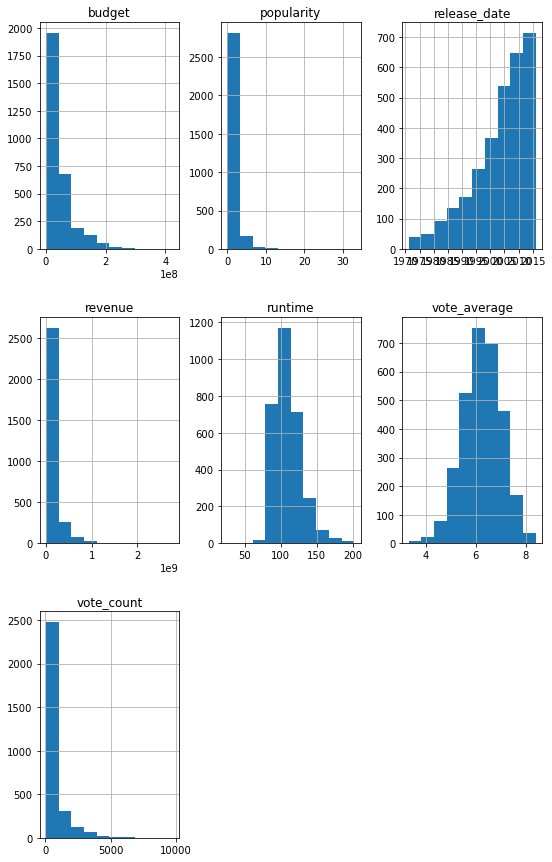

In [21]:
new_data.hist(figsize=(9,15));

<a id='Q1'></a>
### Question 1  (how is the movie industry changing over Time regarding the Rate,buget and popularity ?)


In [22]:
new_data.columns

Index(['budget', 'genres', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'original_title', 'vote_average',
       'vote_count'],
      dtype='object')

In [23]:
time_data = new_data.copy()

In [24]:
time_data.index = time_data['release_date']
time_data.drop('release_date',axis=1,inplace=True)

In [25]:
time_data

,budget,genres,popularity,production_companies,revenue,runtime,original_title,vote_average,vote_count
release_date,,,,,,,,,
2015-06-09,150000000,Action,32.985763,Universal Studios,1513528810,124,Jurassic World,6.5,5562
2015-05-13,150000000,Action,28.419936,Village Roadshow Pictures,378436354,120,Mad Max: Fury Road,7.1,6185
2015-03-18,110000000,Adventure,13.112507,Summit Entertainment,295238201,119,Insurgent,6.3,2480
2015-12-15,200000000,Action,11.173104,Lucasfilm,2068178225,136,Star Wars: The Force Awakens,7.5,5292
2015-04-01,190000000,Action,9.335014,Universal Pictures,1506249360,137,Furious 7,7.3,2947
...,...,...,...,...,...,...,...,...,...
1978-10-06,2300000,Drama,0.512719,Columbia Pictures,35000000,121,Midnight Express,7.5,141
1978-11-15,4000000,Drama,0.496029,Fantasy Films,30471420,132,The Lord of the Rings,6.0,91
1978-12-19,3500000,Horror,0.409377,United Artists,24046533,115,Invasion of the Body Snatchers,6.5,87


In [26]:
sns.set(rc={'figure.figsize':(7,5)})

Text(0.5, 0, 'Movie Industry money over time')

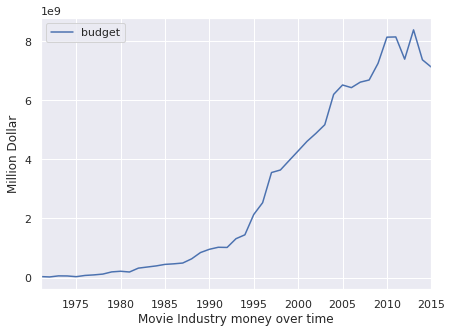

In [27]:
time_data[['budget']].resample('Y').sum().plot()
plt.ylabel('Million Dollar')
plt.xlabel('Movie Industry money over time')

**note**: the budget started in increasing since near 90 's


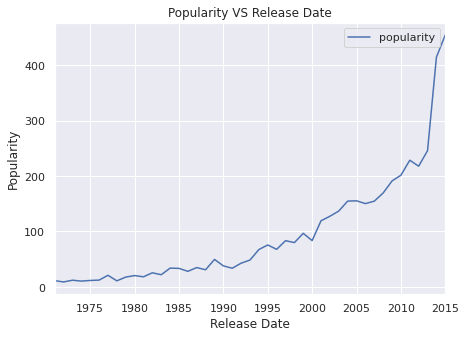

In [28]:
time_data[['popularity']].resample('Y').sum().plot();
plt.title('Popularity VS Release Date');
plt.ylabel('Popularity');
plt.xlabel('Release Date');

**note**: the popularity  started in increasing since 1995

Text(0, 0.5, 'the rate')

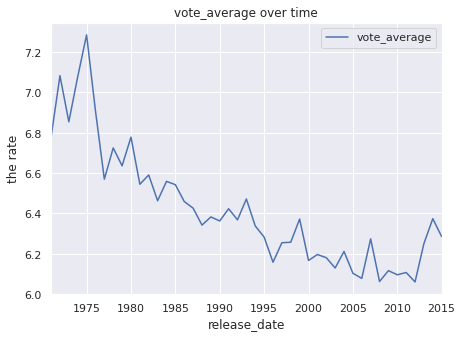

In [29]:
time_data[['vote_average']].resample('Y').mean().plot()
plt.title('vote_average over time')
plt.ylabel('the rate')

**note** : as many movies being made , there are so many movies under 6 rate

but in order to spot the best era in movie indestury , we will only take the above 8.0 movie


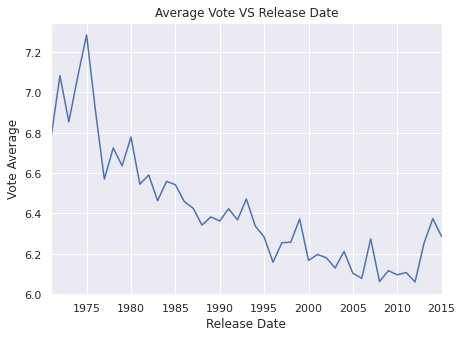

In [30]:
time_data['vote_average'].resample('Y').mean().plot();
plt.title('Average Vote VS Release Date');
plt.ylabel('Vote Average');
plt.xlabel('Release Date');

the 70's was the best era in movies history

In [31]:
new_data.sort_values(by=['vote_average'],ascending=False,inplace=True)
#we sort by the Vote average to get the top movies 

<a id='Q2'></a>
### Question 2 ( what are the most popular genres ? )


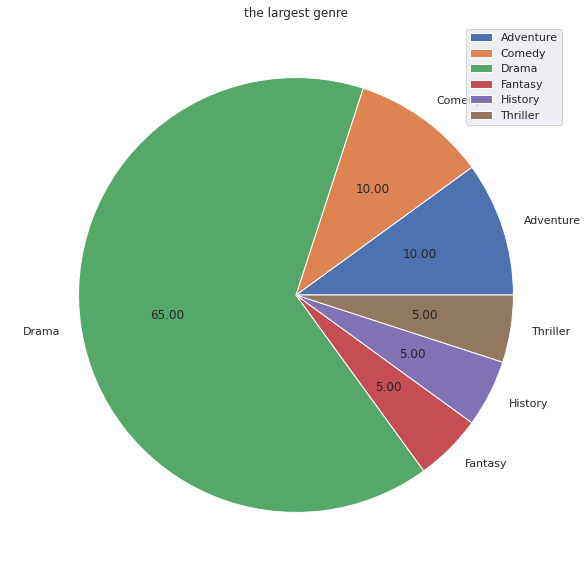

In [32]:
new_data.head(20).groupby(['genres']).count().plot.pie(y='budget',figsize=(10,10),autopct="%.2f")
plt.title('the largest genre')
plt.ylabel(' ');

**note** : the Drama is the bigest in top  20 movie

<a id='Q3'></a>
### Question 3   what is the biggest company in movie industry ?
    

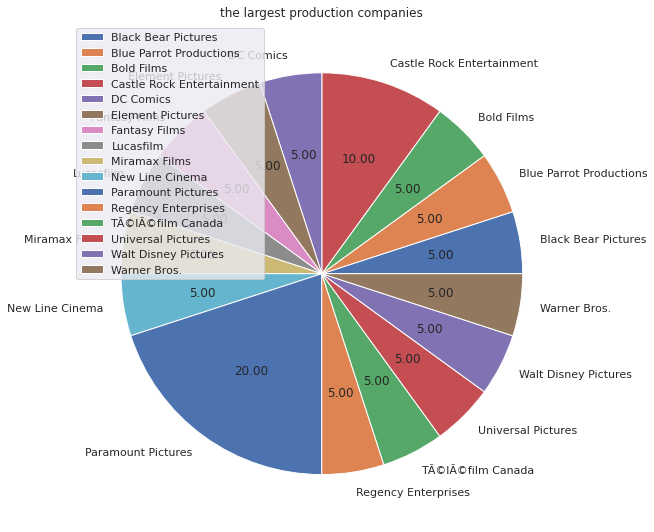

In [33]:
new_data.head(20).groupby(['production_companies']).count().plot.pie(y='budget',figsize=(9,12),autopct='%.2f')
plt.title('the largest production companies');
plt.ylabel(' ');

**Note** : *Black Bear Pictures* is the biggest production Company

<a id='Q4'></a>
### Question 4  comparing between revenue and budget .


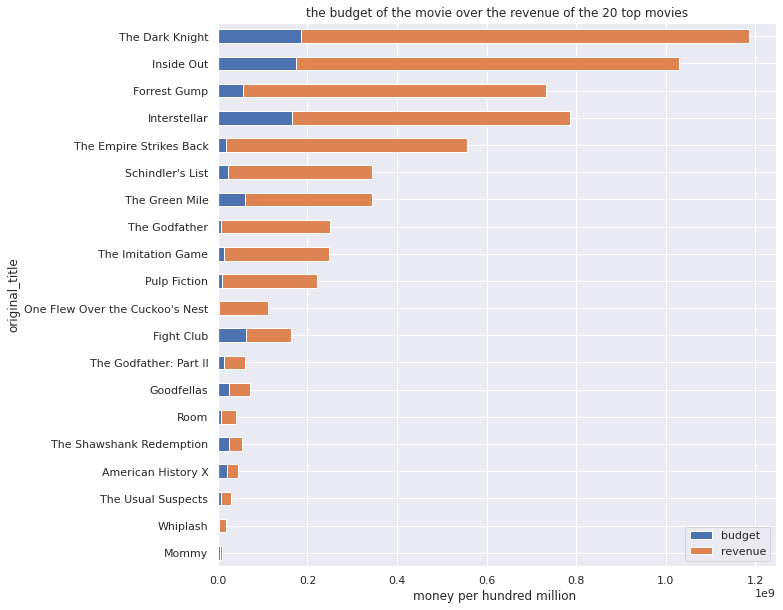

In [34]:
top_df=new_data.set_index('original_title')
top_df[['budget','revenue']].head(20).sort_values(['revenue']).plot(kind='barh',stacked=True,figsize=(10,10),grid=True);
plt.title('the budget of the movie over the revenue of the 20 top movies');
plt.xlabel('money per hundred million ');

**Note** : *The Dark Night* has the biggest scale of revenue over budget  
**Note** : The top 5 movies in revenue are:
1. The Dark Night
2. Inside Out
3. Forrest Gumb
4. Interstaller
5. The Empire Strikes Back

In [35]:
new_data.index = new_data[['original_title']]

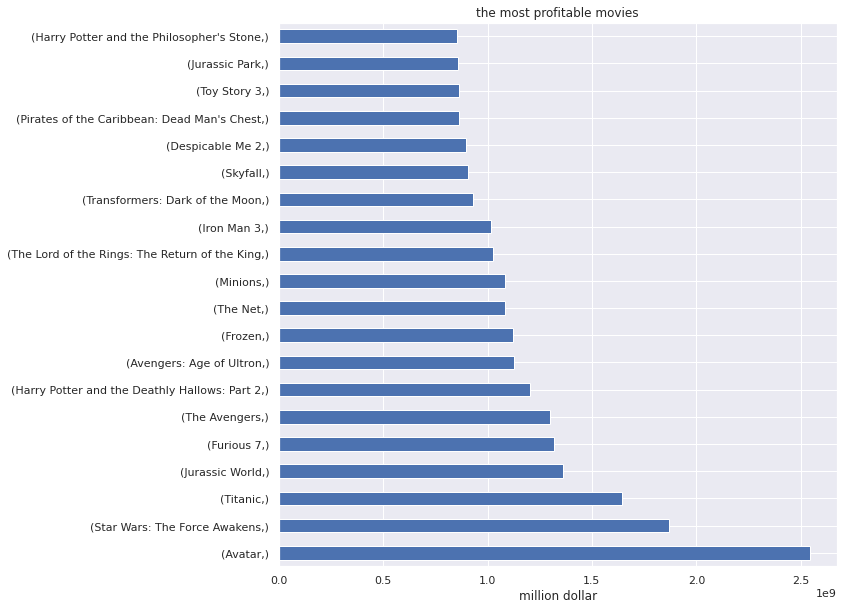

In [36]:
new_data['profit'] = new_data['revenue'] - new_data['budget']
new_data.sort_values(by=['profit'],ascending=False)['profit'].head(20).plot(kind='barh',figsize=(10,10),grid=True)
plt.title('the most profitable movies');
plt.xlabel('million dollar');

**Note** :  *Avatar* have the highst profit

In [37]:
# count the missing values of eac column
movies_df.isnull().sum()  #10866

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<a id='conclusions'></a>
## Conclusions
- one of limitations i came accross is the missing values of homepage , tageline,keywords and  production_companies columns it was about 80% , 28%, 15%, 10% respectively

- the change over the time (the budget started in increasing since near 1985 ,the popularity has a great increasing in 2020 ,as many movies being made there are so many movies under 6 rate )
​
​
- the **Drama** genre is the biggest in the 20 top movie 
​
​
- ***paramount pictures*** copmany had the biggest chunck in makeing the greatest 20 movies (***note***: paramount pictures copmany had the biggest chunck in makeing the greatest 20 movies 
​
- ***paramount Pictures*** was domeniting the movie indesture till near 2005 
​
- universal picture started domeiting since 2005 till near 2020 
​
- columba sized the shirnking in the paramount pictures and trying to take place near 2005 ) 
​
​
- **Avater** Movie has the highest profit 
***
**The top 5 movies in revenue are :**
1. The Dark Night
2. Inside Out
3. Forrest Gumb
4. Interstaller
5. The Empire Strikes Back
***
